# **RBC Classification using CNN**

**Importing the required libraries and modules**

In [216]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [217]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

**Setting the required directories etc**

In [237]:
img_width = 150
img_height = 150

train_data_dir = '../input/red-blood-cells/individual_cells/train'
validation_data_dir = '../input/red-blood-cells/individual_cells/val'
train_samples = 1301
validation_samples = 60
epochs = 90
batch_size = 15

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

**Creating the model**

In [238]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

In [239]:
import keras
from keras import optimizers
model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001), 
              metrics=['accuracy'])

In [240]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [241]:
# augmentation configuration used for testing:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [242]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1301 images belonging to 3 classes.


In [243]:
print(train_generator.class_indices)

{'circular': 0, 'elongated': 1, 'other': 2}


In [244]:
imgs, labels = next(train_generator)

In [134]:
#input_shape = (150,150,3)

In [245]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

15
[0. 1. 0.]


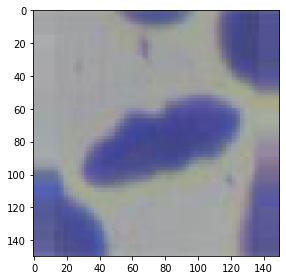

[0. 0. 1.]


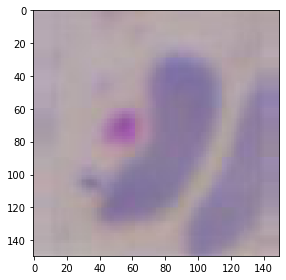

[0. 0. 1.]


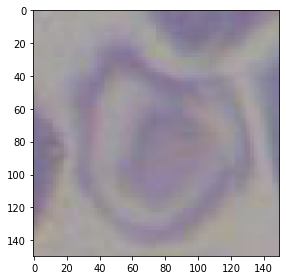

[0. 1. 0.]


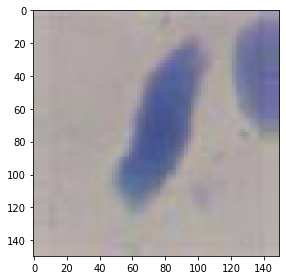

[1. 0. 0.]


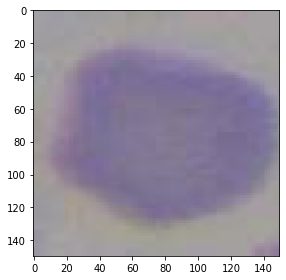

[1. 0. 0.]


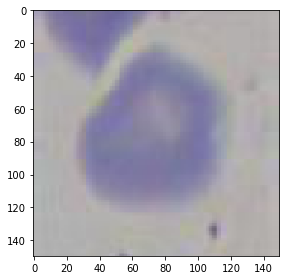

[1. 0. 0.]


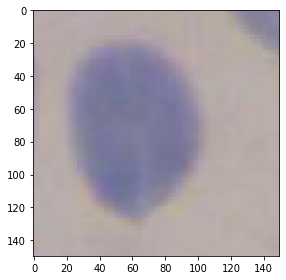

[1. 0. 0.]


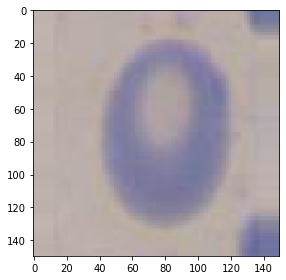

[0. 0. 1.]


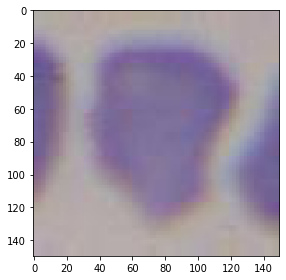

[0. 1. 0.]


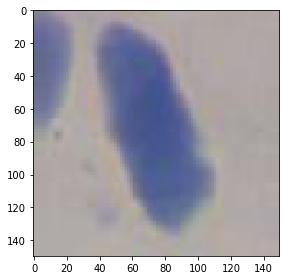

[1. 0. 0.]


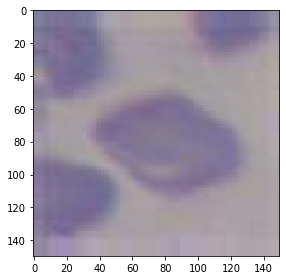

[0. 0. 1.]


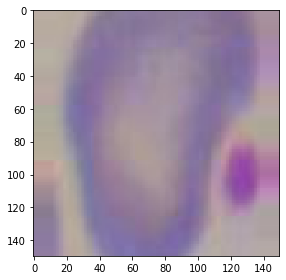

[1. 0. 0.]


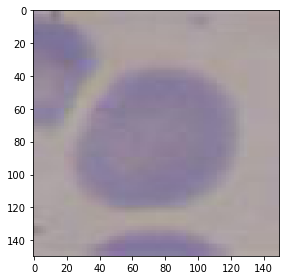

[0. 0. 1.]


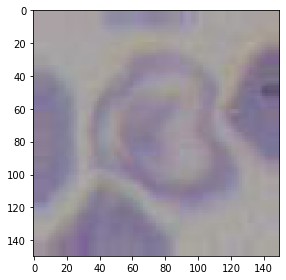

[0. 1. 0.]


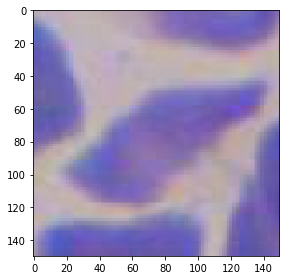

In [246]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [247]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 60 images belonging to 3 classes.


**Training the model**

In [248]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/90
86/86 [==============================] - 26s 289ms/step - loss: 1.1092 - accuracy: 0.2980 - val_loss: 1.0930 - val_accuracy: 0.4167
Epoch 2/90
86/86 [==============================] - 24s 276ms/step - loss: 1.0872 - accuracy: 0.3840 - val_loss: 1.0287 - val_accuracy: 0.5000
Epoch 3/90
86/86 [==============================] - 24s 277ms/step - loss: 1.0259 - accuracy: 0.4820 - val_loss: 0.8522 - val_accuracy: 0.7000
Epoch 4/90
86/86 [==============================] - 24s 276ms/step - loss: 0.9194 - accuracy: 0.5405 - val_loss: 0.7819 - val_accuracy: 0.6500
Epoch 5/90
86/86 [==============================] - 24s 272ms/step - loss: 0.8124 - accuracy: 0.6496 - val_loss: 0.7223 - val_accuracy: 0.6833
Epoch 6/90
86/86 [==============================] - 24s 278ms/step - loss: 0.7188 - accuracy: 0.6910 - val_loss: 0.6652 - val_accuracy: 0.7167
Epoch 7/90
86/86 [==============================] - 23s 272ms/step - loss: 0.6731 - accuracy: 0.6863 - val_loss: 0.6669 - val_accuracy: 0.7500

In [ ]:
y = model.save_weights('RBC_one.h5') 

In [249]:
x = history.history['accuracy']
best_accuracy = max(x)
best_accuracy

0.9300155639648438

**Final accuracy obtained**

In [250]:
z = history.history['accuracy'][-1]

In [251]:
print('accuracy obtained =',z*100)

accuracy obtained = 92.0684278011322


In [252]:
import matplotlib.pyplot as plt
%matplotlib inline

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


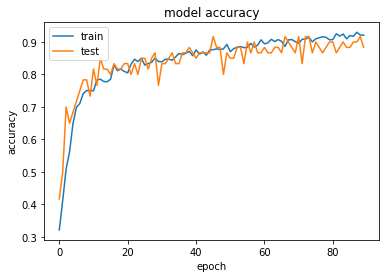

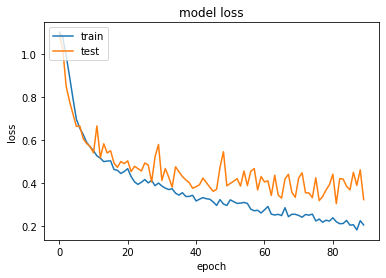

In [253]:
# list all data in history
print(history.history.keys())
# summarizing the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarizing the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Prediction**

In [258]:
predict_dir_path='../input/red-blood-cells/individual_cells/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['e0066.jpg', 'e0087.jpg', 'o0155.jpg', 'o0082.jpg', 'c0054.jpg', 'o0135.jpg', 'e0167.jpg', 'c0023.jpg', 'o0164.jpg', 'c0010.jpg', 'c0001.jpg', 'c0018.jpg', 'o0117.jpg', 'e0153.jpg', 'e0100.jpg']


In [259]:
# predicting images
from keras.preprocessing import image
circular_counter = 0 
elongated_counter  = 0
other_counter = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path +file , target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0]
    
    if classes == 0:
        print(file + ": " + 'circular')
        circular_counter += 1
    elif classes == 1:
        print(file + ": " + 'elongated')
        elongated_counter += 1
    else:
        print(file + ": " + 'other')
        other_counter += 1
print("Total Circular :",circular_counter)
print("Total Elongated :",elongated_counter)
print("Total Other :",other_counter)

e0066.jpg: elongated
e0087.jpg: elongated
o0155.jpg: circular
o0082.jpg: elongated
c0054.jpg: circular
o0135.jpg: other
e0167.jpg: elongated
c0023.jpg: circular
o0164.jpg: other
c0010.jpg: circular
c0001.jpg: circular
c0018.jpg: circular
o0117.jpg: other
e0153.jpg: elongated
e0100.jpg: elongated
Total Circular : 6
Total Elongated : 6
Total Other : 3
